In [1]:
import polars as pl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from os.path import join
import os.path
import numpy as np
from skimage.io import imread


In [2]:
# df1 = pl.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/updt_names_testProject.csv')
# df2 = pl.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/updt_names_testProject2.csv')
# df3 = pl.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/updt_names_testProject3.csv')
# data_root_dir = '/data/data_drive/Macaque_CB/processing/results_from_cell_counts/'


data_root_dir = '/data/neuralabc/neuralabc_volunteers/macaque/'
df1 = pl.read_csv(join(data_root_dir, 'updt_names_testProject.csv'))
df2 = pl.read_csv(join(data_root_dir,'updt_names_testProject2.csv'))
df3 = pl.read_csv(join(data_root_dir,'updt_names_testProject3.csv'))


blank_slide = 48 #slide number for blank slide, potentially different from _Image number

# df1 = pd.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/names_testProject.csv')
# df2 = pd.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/names_testProject2.csv')
# df2 = pd.read_csv('/data/data_drive/Macaque_CB/processing/results_from_cell_counts/names_testProject3.csv')

# Edits:
- the following file: `_Image_47_-_20x_cellCount_29_downsample_10p001um_pix.tif` in the first testproject (TP1 or just testproject) had a slightly different file name due to precision counting errors and has been renamed to: `..._10p002um_pix.tif`. The original file is in the BACKUP subdir 
- in TP1: _Image_47 (01) is blank (this is actual slide slice 48)
    - the actual slide is also blank, so this should be considered a missing slice

In [3]:
## strange file naming conventions make this hard, but we should be there now.

dict_out = {}
dict_out['image_idx'] = [] #this is actually a float, to reflect the fact that we may have two images per slide 
dict_out['file_name'] = []

tp_dir = join(data_root_dir,'testProject/results_cell_counts')
print('TP1')
for row in df1.rows(named=True):
    image_num = str(row['Image File Name _Image_YY.vsi']).zfill(2)
    image_sub_num = str(row['Num. of Images of Slide 20x_0Y']).zfill(2)
    label_slide_idx = row['Label Slide Number']
    
    if (row['Alternative Name'] is None): #an alternative name is specified, so we need to construct based on this
        fname_template_txt = f'_Image_{image_num}_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = f'_Image_{image_num}_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)
    else: #we are dealing with an alternatively named slide, so there are again two options for this
        fname_template_txt = row['Alternative Name'] + f'_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
       
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = row['Alternative Name'] + '_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)

            
tp_dir = join(data_root_dir,'testProject2/results_cell_counts')
print('TP2')
for row in df2.rows(named=True):
    image_num = str(row['Image File Name _Image_YY.vsi']).zfill(2)
    image_sub_num = str(row['Num. of Images of Slide 20x_0Y']).zfill(2)
    label_slide_idx = row['Label Slide Number']
    
    if (row['Alternative Name'] is None): #an alternative name is specified, so we need to construct based on this
        fname_template_txt = f'_Image_{image_num}_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = f'_Image_{image_num}_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)
    else: #we are dealing with an alternatively named slide, so there are again two options for this
        fname_template_txt = row['Alternative Name'] + f'_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
       
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = row['Alternative Name'] + '_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)

tp_dir = join(data_root_dir,'testProject3/results_cell_counts')

print('TP3')
for row in df3.rows(named=True):
    image_num = str(row['Image File Name _Image_YY.vsi']).zfill(2)
    image_sub_num = str(row['Num. of Images of Slide 20x_0Y']).zfill(2)
    label_slide_idx = row['Label Slide Number']
    
    if (row['Alternative Name'] is None): #an alternative name is specified, so we need to construct based on this
        fname_template_txt = f'_Image_{image_num}_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = f'_Image_{image_num}_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)
    else: #we are dealing with an alternatively named slide, so there are again two options for this
        fname_template_txt = row['Alternative Name'] + f'_-_20x_{image_sub_num}_cellCount_29_downsample_10p002um_pix.tif'
       
        if image_sub_num == '01': #first make sure that we are only on the 1st image
            alt_fname_template_txt = row['Alternative Name'] + '_-_20x_cellCount_29_downsample_10p002um_pix.tif' #if only one image, the alt text should exist (no image_sub_num)
            alt_fname = join(tp_dir,alt_fname_template_txt)
        fname = join(tp_dir,fname_template_txt)

        if os.path.exists(fname):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(fname)
        elif (image_sub_num == '01') and (os.path.exists(alt_fname)):
            dict_out['image_idx'].append(label_slide_idx + int(image_sub_num)/10.)
            dict_out['file_name'].append(alt_fname)
        else:
            print('MISSING SLIDE - SOMETHING HAS GONE WRONG!!')
            print(fname_template_txt)
            print(alt_fname_template_txt)

df_out = pd.DataFrame(dict_out)     

TP1
TP2
TP3


In [4]:
#check, every value should be unique
if not (np.unique(dict_out['image_idx']).shape[0] == len(dict_out['image_idx'])):
    print(np.unique(dict_out['image_idx']).shape[0])
    print(len(dict_out['image_idx']))
else:
    print('every index value is unique')
    
#note the ones that are not, in case they exist
unique_idx = np.unique(dict_out['image_idx'])
for idx in unique_idx:
    _t = df_out[df_out['image_idx']==idx]
    if len(_t)>1:
        print('hi')
        print(_t['image_idx'])
        # break
        for row in range(len(_t)):
            print(_t['file_name'].iloc[row])

every index value is unique


In [5]:
# now we should determine if there are any gaps in our slices, and if so what we should do...
# note from above that slide #48 is actually BLANK 
diff_sort = np.diff(np.sort(df_out.image_idx)) 
missing_slices_num = (diff_sort>1.001).sum() #need to be larger than 1., otherwise false pos!

print(f'Gap of one or more slices occurs {missing_slices_num} time(s)')
if missing_slices_num > 0:
    print(df_out.file_name[np.where(diff_sort>1)[0][0]])
    print(df_out.image_idx[np.where(diff_sort>1)[0][0]+1])

Gap of one or more slices occurs 0 time(s)


['/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_47_-_20x_cellCount_29_downsample_10p002um_pix.tif']


Text(0.5, 1.0, '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_47_-_20x_cellCount_29_downsample_10p002um_pix.tif')

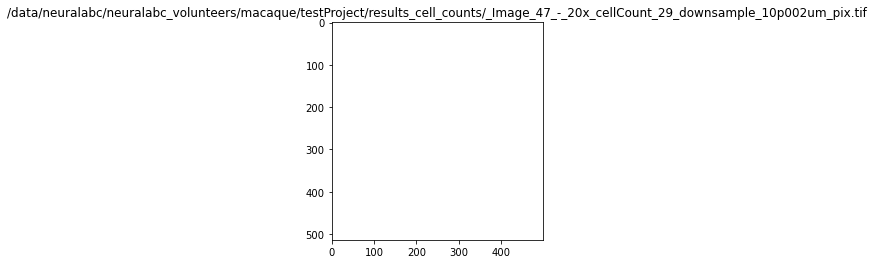

In [6]:
#if there are any blank slides, lets confirm their indices here - we will have to remove this image from consideration and then re-insert later
blank_slide_idx = blank_slide + .1 #we added an offset for multiple images in a single slide, so the first will be indexed as X.1
a = df_out.file_name[df_out.image_idx == blank_slide_idx]
print(df_out.file_name[df_out.image_idx == blank_slide_idx].values)
fname = df_out.file_name[df_out.image_idx == blank_slide_idx].values[0]
img = imread(fname)
plt.imshow(img,cmap='Greys')
plt.title(fname)

In [7]:
#remove the missing image, sort the output, the save to csv
out_fname = join(data_root_dir,'all_TP_image_idxs_file_lookup.csv')
df_out_final = df_out[~(df_out.image_idx == blank_slide_idx)].sort_values(by='image_idx')
df_out_final.to_csv(out_fname)
print(out_fname)
input_file_list = df_out_final['file_name'].values

/data/neuralabc/neuralabc_volunteers/macaque/all_TP_image_idxs_file_lookup.csv


In [8]:
input_file_list

array(['/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_01_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_01_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_02_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_02_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_03_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_03_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
       '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_04_-_20x_01_cellCount_29_d

In [10]:
_df = pd.read_csv('/data/neuralabc/neuralabc_volunteers/macaque/all_TP_image_idxs_file_lookup.csv')
list(_df['file_name'].values)

['/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_01_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_01_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_02_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_02_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_03_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_03_-_20x_02_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neuralabc/neuralabc_volunteers/macaque/testProject/results_cell_counts/_Image_04_-_20x_01_cellCount_29_downsample_10p002um_pix.tif',
 '/data/neura

In [57]:
#these should be the same!!!
print(np.unique(dict_out['image_idx']).shape)
print(len(dict_out['image_idx']))

(112,)
113


In [59]:
from skimage import io
plt.imshow(io.imread('../processing/results_from_cell_counts/TP2/_Image_90_-_20x_01_cellCount_29_downsample_10p002um_pix.tif'),cmap='Greys')

In [26]:
!ls /data/data_drive/Macaque_CB/processing/results_from_cell_counts/TP1/_Image_01_-_20x_1_cellcount_29_downsample_10p002um_pix.tif

ls: cannot access '/data/data_drive/Macaque_CB/processing/results_from_cell_counts/TP1/_Image_01_-_20x_1_cellcount_29_downsample_10p002um_pix.tif': No such file or directory
